#Bài toán 1: Dự đoán giá bơ Hass ở US

### Business Objective/Problem

- Bơ “Hass”, một công ty có trụ sở tại Mexico, 
chuyên sản xuất nhiều loại quả bơ được bán 
ở Mỹ. Họ đã rất thành công trong những năm 
gần đây và muốn mở rộng. Vì vậy, họ muốn 
xây dựng mô hình hợp lý để dự đoán giá 
trung bình của bơ “Hass” ở Mỹ nhằm xem 
xét việc mở rộng các loại trang trại Bơ đang 
có cho việc trồng bơ ở các vùng khác.

### <font color="darkblue"> Triển khai dự án </font>

#### <font color="red"> Bước 1: Business Understanding </font>

# Dựa vào mô tả nói trên (hoặc sau khi đặt ra các câu
hỏi cụ thể cho doanh nghiệp và các đối tượng có liên
quan) => xác định được vấn đề: 
- Hiện tại: Công ty kinh doanh quả bơ ở rất nhiều vùng của
nước Mỹ với 2 loại bơ là bơ thường và bơ hữu cơ, được
đóng gói theo nhiều quy chuẩn (Small/Large/XLarge Bags), 
và có 3 PLU (Product Look Up) khác nhau (4046, 4225, 
4770). Nhưng họ chưa có mô hình để dự đoán giá bơ cho
việc mở rộng.
- => Mục tiêu/ Vấn đề: Xây dựng mô hình dự đoán giá trung 
bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất, 
kinh doanh.

#### <font color="red"> Bước 2: Data Understanding/ Acquire </font>

Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ 
liệu mà công ty đang có:
- Dữ liệu được lấy trực tiếp từ máy tính tiền của các nhà bán 
lẻ dựa trên doanh số bán lẻ thực tế của bơ Hass.
- Dữ liệu đại diện cho dữ liệu lấy từ máy quét bán lẻ hàng 
tuần cho lượng bán lẻ (National retail volume- units) và giá
bơ từ tháng 4/2015 đến tháng 3/2018.
- Giá Trung bình (Average Price) trong bảng phản ánh giá 
trên một đơn vị (mỗi quả bơ), ngay cả khi nhiều đơn vị (bơ) 
được bán trong bao.
- Mã tra cứu sản phẩm - Product Lookup codes (PLU’s) trong 
bảng chỉ dành cho bơ Hass, không dành cho các sản phẩm 
khác.

Toàn bộ dữ liệu được đổ ra và lưu trữ trong tập tin avocado.csv 
với 18249 record. Với các cột: 
- Date - ngày ghi nhận
- AveragePrice – giá trung bình của một quả bơ
- Type - conventional / organic – loại: thông thường/ hữu cơ
- Region – vùng được bán
- Total Volume – tổng số bơ đã bán
- 4046 – tổng số bơ có mã PLU 4046 đã bán
- 4225 - tổng số bơ có mã PLU 4225 đã bán
- 4770 - tổng số bơ có mã PLU 4770 đã bán
- Total Bags – tổng số túi đã bán
- Small/Large/XLarge Bags – tổng số túi đã bán theo size  
Có hai loại bơ trong tập dữ liệu và một số vùng khác nhau. Điều 
này cho phép chúng ta thực hiện tất cả các loại phân tích cho 
các vùng khác nhau, hoặc phân tích toàn bộ nước Mỹ theo một 
trong hai loại bơ. 

=> Có thể tập trung giải quyết hai bài toán 
- Bài toán 1: USA’s Avocado AveragePrice 
Prediction – Sử dụng các thuật toán Regression 
như Linear Regression, Random Forest, 
XGB Regressor...
- Bài toán 2: Conventional/Organic Avocado 
Average Price Prediction for the future in 
California/NewYork… - sử dụng các thuật toán 
Time Series như ARIMA, Prophet...

#### <font color="red"> Bước 3: Data preparation/ Prepare </font>

In [ ]:
%%capture
!pip install fbprophet
!pip install pandas-profiling==2.7.1
!pip install pmdarima
!pip install xgboost
!pip install lazypredict

In [ ]:
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
import pandas_profiling as pp
import scipy
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/LDS0_k271_HoangDucHuy/Project_01_price_prediction_and_time_series/Re_do'

/content/gdrive/My Drive/LDS0_k271_HoangDucHuy/Project_01_price_prediction_and_time_series/Re_do


In [ ]:
data = pd.read_csv('avocado.csv', index_col = 0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [ ]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


#Bài toán 1: Organic Avocado's Price Prediction

In [ ]:
#type = organic

In [ ]:
#copy sagn df mới để xử lý
df = data.copy(deep=True)

In [ ]:
pp.ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

Nhận xét:
Từ Pandas Prodiling ta thấy:
- Không có missing value
- Không có duplicate row

In [ ]:
#Kiểm tra null --> không có null
df.isnull().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [ ]:
#Kiểm tra NaN --> không có NaN
df.isna().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [ ]:
#kiểm tra duplicate --> không có dữ liệu duplicate
df.duplicated().any()

False

In [ ]:
df.shape 

(18249, 13)

In [ ]:
#đổi tên các cột để dễ sử dụng
dict = {'Total Volume': 'TotalVolume', 'Total Bags': 'TotalBags', 'Small Bags': 'SmallBags',
        'Large Bags': 'LargeBags', 'XLarge Bags': 'XLargeBags',
        '4046': 'type_4046', '4225': 'type_4225', '4770': 'type_4770'}
  
# call rename () method
df.rename(columns=dict,
          inplace=True)

#Phân tích đơn biến

###Biến liên tục

In [ ]:
#Chọn phân tích các biến tiêu biểu:
#TotalBags, TotalVolume

skew =  9.00768747885452 (> 0): Phan phoi lech phai
kurtosis =  92.10445777646086 (> 0): Phan phoi nhon hon phan phoi chuan
Q1 =  10838.58 , Q3 =  432962.29 , IQR =  422123.70999999996
var =  11926975521801.33 , std =  3453545.3553994815


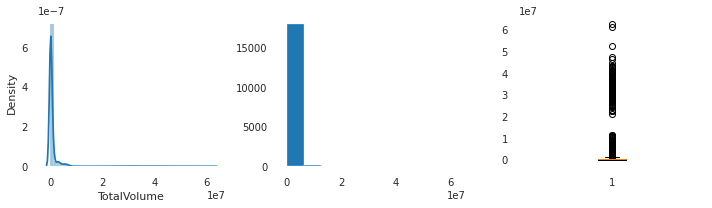

so outlier (UPPER) =  2297
so outlier (LOWER) =  0
% outlier =  12.586991068003725 %


In [ ]:
#TotalVolume
Q1_TotalVolume= np.percentile(df.TotalVolume, 25)
Q3_TotalVolume= np.percentile(df.TotalVolume, 75) 
iqr_TotalVolume= scipy.stats.iqr(df.TotalVolume) 
var = df.TotalVolume.var()
std = df.TotalVolume.std() 
skew = df.TotalVolume.skew() 
kurtosis = df.TotalVolume.kurtosis() 
#---------------------------------------------------
if skew > 0:
    print('skew = ', skew, '(> 0): Phan phoi lech phai')
elif skew == 0:
    print('skew = 0: Phan phoi khong lech so voi phan phoi chuan') 
else:
    print('skew = ', skew,'(< 0): Phan phoi lech trai')

if kurtosis > 0:
    print('kurtosis = ', kurtosis, '(> 0): Phan phoi nhon hon phan phoi chuan')
elif kurtosis == 0:
    print('kurtosis = 0: Phan phoi co do nhon bang phan phoi chuan')
else:
    print('kurtosis = ', kurtosis, '(< 0): Phan phoi khong nhon bang phan phoi chuan')

print('Q1 = ', Q1_TotalVolume, ', Q3 = ', Q3_TotalVolume, ', IQR = ', iqr_TotalVolume)
print('var = ', var, ', std = ', std)
#Visualization
plt.figure(figsize=(10, 3), tight_layout=True)
plt.subplot(1, 3, 1) 
sns.distplot(df['TotalVolume'])
plt.subplot(1, 3, 2)
plt.hist(df['TotalVolume']) 
plt.subplot(1, 3, 3)
plt.boxplot(df['TotalVolume']) 
plt.show() 
#------------------------------------
#So outlier 
n_o_upper = df[df['TotalVolume'] > (Q3_TotalVolume+ 1.5*iqr_TotalVolume)].shape[0] 
n_o_lower = df[df['TotalVolume'] < (Q1_TotalVolume- 1.5*iqr_TotalVolume)].shape[0]  
print('so outlier (UPPER) = ', n_o_upper) 
print('so outlier (LOWER) = ', n_o_lower) 
print('% outlier = ', (n_o_upper + n_o_lower) / df.shape[0] * 100 , '%' )


skew =  9.756071670300289 (> 0): Phan phoi lech phai
kurtosis =  112.27215647043404 (> 0): Phan phoi nhon hon phan phoi chuan
Q1 =  5088.64 , Q3 =  110783.37 , IQR =  105694.73
var =  972674070012.1465 , std =  986242.3992164129


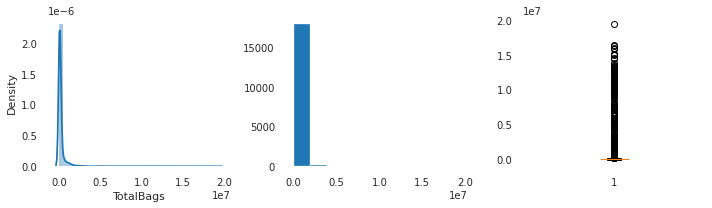

so outlier (UPPER) =  2533
so outlier (LOWER) =  0
% outlier =  13.88021261438983 %


In [ ]:
#TotalBags
Q1_TotalBags= np.percentile(df.TotalBags, 25)
Q3_TotalBags= np.percentile(df.TotalBags, 75) 
iqr_TotalBags= scipy.stats.iqr(df.TotalBags) 
var = df.TotalBags.var()
std = df.TotalBags.std() 
skew = df.TotalBags.skew() 
kurtosis = df.TotalBags.kurtosis() 
#---------------------------------------------------
if skew > 0:
    print('skew = ', skew, '(> 0): Phan phoi lech phai')
elif skew == 0:
    print('skew = 0: Phan phoi khong lech so voi phan phoi chuan') 
else:
    print('skew = ', skew,'(< 0): Phan phoi lech trai')

if kurtosis > 0:
    print('kurtosis = ', kurtosis, '(> 0): Phan phoi nhon hon phan phoi chuan')
elif kurtosis == 0:
    print('kurtosis = 0: Phan phoi co do nhon bang phan phoi chuan')
else:
    print('kurtosis = ', kurtosis, '(< 0): Phan phoi khong nhon bang phan phoi chuan')

print('Q1 = ', Q1_TotalBags, ', Q3 = ', Q3_TotalBags, ', IQR = ', iqr_TotalBags)
print('var = ', var, ', std = ', std)
#Visualization
plt.figure(figsize=(10, 3), tight_layout=True)
plt.subplot(1, 3, 1) 
sns.distplot(df['TotalBags'])
plt.subplot(1, 3, 2)
plt.hist(df['TotalBags']) 
plt.subplot(1, 3, 3)
plt.boxplot(df['TotalBags']) 
plt.show() 
#------------------------------------
#So outlier 
n_o_upper = df[df['TotalBags'] > (Q3_TotalBags+ 1.5*iqr_TotalBags)].shape[0] 
n_o_lower = df[df['TotalBags'] < (Q1_TotalBags- 1.5*iqr_TotalBags)].shape[0]  
print('so outlier (UPPER) = ', n_o_upper) 
print('so outlier (LOWER) = ', n_o_lower) 
print('% outlier = ', (n_o_upper + n_o_lower) / df.shape[0] * 100 , '%' )


###Biến phân loại

['conventional' 'organic'] 

conventional    9126
organic         9123
Name: type, dtype: int64


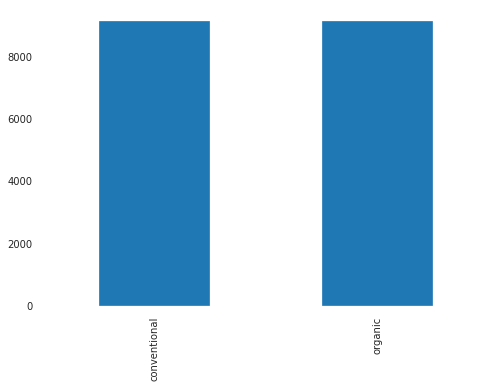

In [ ]:
#type
print(df.type.unique(), '\n')  
print(df['type'].value_counts()   ) 
df['type'].value_counts().plot.bar() 

Nhận xét: số lượng bơ conventional và organic gần như tương đương

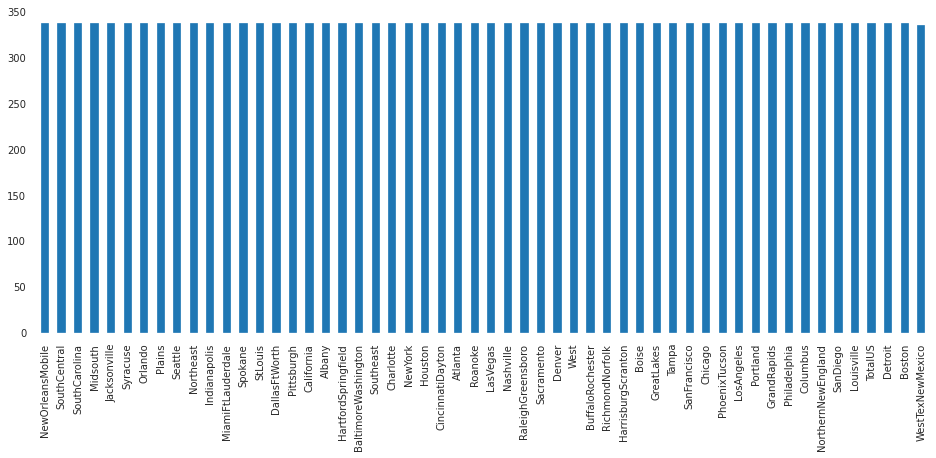

In [ ]:
# region
plt.figure(figsize=(16,6))
df['region'].value_counts().plot.bar()
plt.show()

#Phân tích 2 biến

###Xem xét quan hệ giữa các biến input và output

###Giữa biến phân loại và output

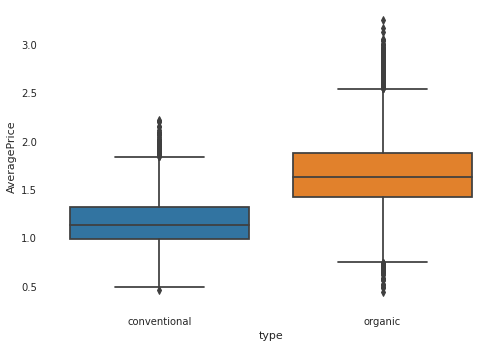

In [ ]:
#liệu biến type có ảnh hưởng đến Average Price?
sns.boxplot(data=df, x='type', y='AveragePrice')
plt.show()

Nhận xét:
- Giá trung bình bị ảnh hưởng bởi loại bơ
- Loại bơ organic có giá trung bình cao hơn loại bơ conventional

In [ ]:
#liệu biến region có ảnh hưởng đến Average Price không?

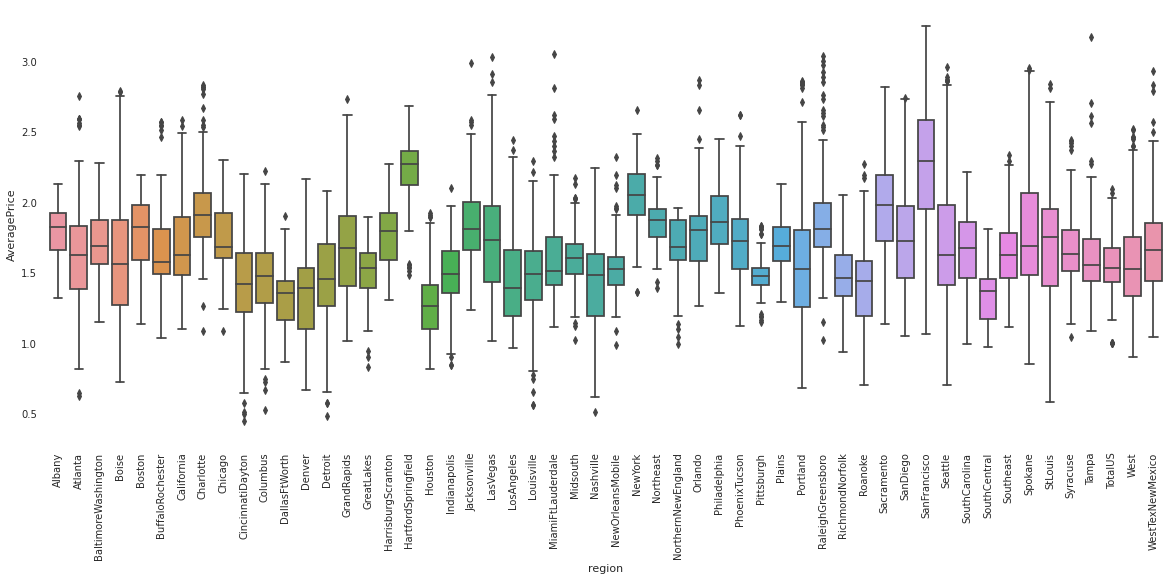

In [ ]:
#các vùng bán loại bơ organic:
#lọc data type = organic
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=df[df['type'] == 'organic'], x='region', y='AveragePrice')
plt.xticks(rotation=90) #xoay tên các region lại
plt.show()

Nhận xét:
- Những vùng có giá bơ organic cao: San Francisco, Spokane, Las Vegas, ...
- Những vùng có giá bơ organic thấp: Nashville, StLouis, Denver, ...

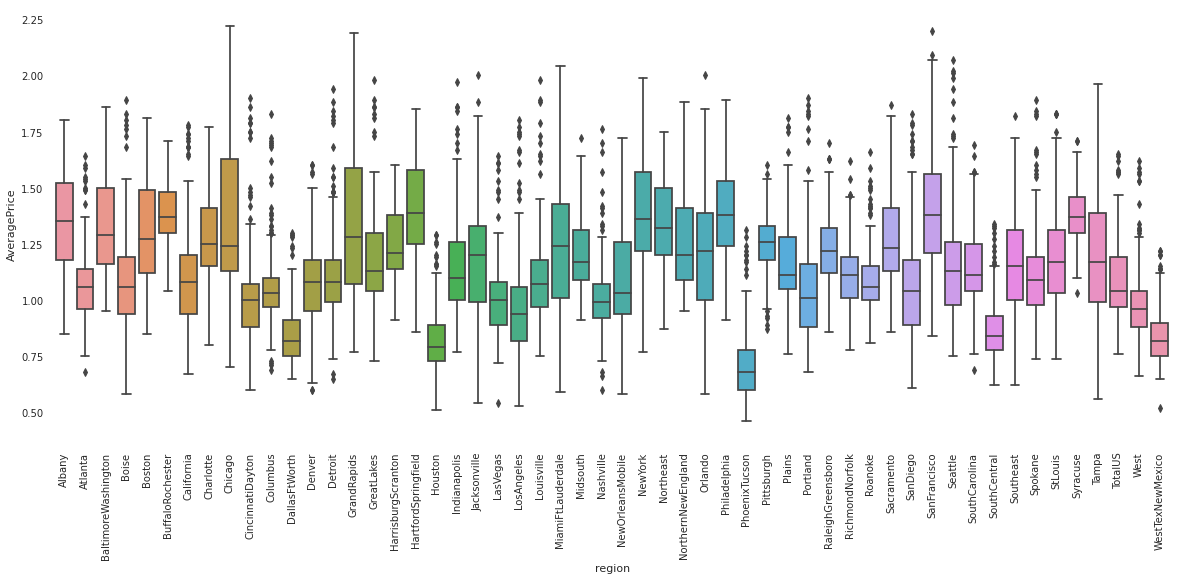

In [ ]:
#các vùng bán loại bơ conventional:
#lọc data type = conventional
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(data=df[df['type'] == 'conventional'], x='region', y='AveragePrice')
plt.xticks(rotation=90) #xoay tên các region lại
plt.show()

Nhận xét:
- Những vùng có giá bơ conventional cao: Chicago, SanFrancisco, GrandRapids
- Những vùng có giá bơ conventional thấp: PhonixTucson, Boise, LosAngeles

==> Giá bơ (AveragePrice) có bị ảnh hưởng bởi region (cả 2 loại organic và conventional)

###Giữa biến liên tục và output

In [ ]:
#Correlation:
corr = df.corr()
corr 

,AveragePrice,TotalVolume,type_4046,type_4225,type_4770,TotalBags,SmallBags,LargeBags,XLargeBags,year
AveragePrice,1.00,-0.19,-0.21,-0.17,-0.18,-0.18,-0.17,-0.17,-0.12,0.09
TotalVolume,-0.19,1.00,0.98,0.97,0.87,0.96,0.97,0.88,0.75,0.02
type_4046,-0.21,0.98,1.00,0.93,0.83,0.92,0.93,0.84,0.70,0.00
type_4225,-0.17,0.97,0.93,1.00,0.89,0.91,0.92,0.81,0.69,-0.01
type_4770,-0.18,0.87,0.83,0.89,1.00,0.79,0.80,0.70,0.68,-0.04
TotalBags,-0.18,0.96,0.92,0.91,0.79,1.00,0.99,0.94,0.80,0.07
SmallBags,-0.17,0.97,0.93,0.92,0.80,0.99,1.00,0.90,0.81,0.06
LargeBags,-0.17,0.88,0.84,0.81,0.70,0.94,0.90,1.00,0.71,0.09
XLargeBags,-0.12,0.75,0.70,0.69,0.68,0.80,0.81,0.71,1.00,0.08
year,0.09,0.02,0.00,-0.01,-0.04,0.07,0.06,0.09,0.08,1.00


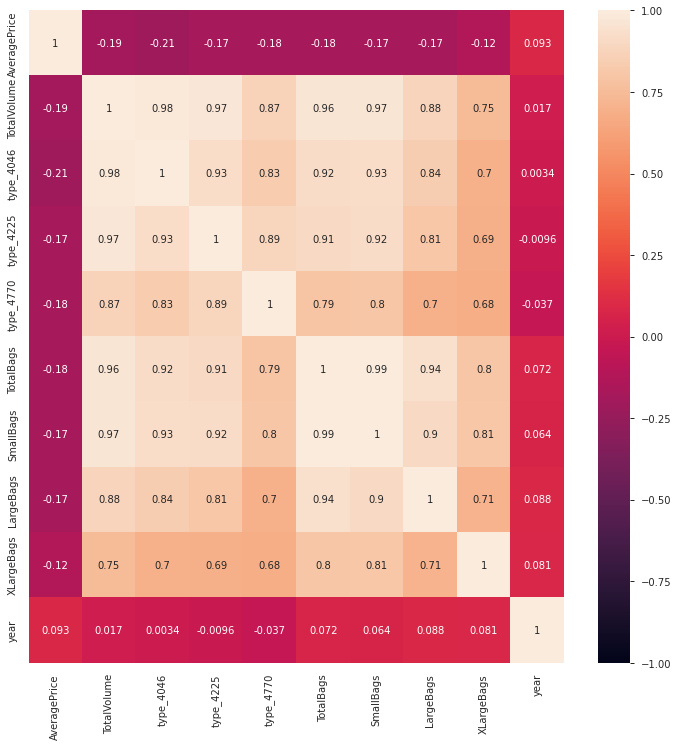

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)
plt.show()

Nhận xét:
- Average Price có quan hệ tuyến tính yếu với các thuộc tính liên tục (không thể nói là không build được model có độ chính xác cao, mà phải nói nếu dùng linear regression thì khó có độ chính xác cao. Dùng model phi tuyến thì có thể độ chính xác cao hơn)
- Total Volume và TotalBags có quan hệ tuyến tính mạnh với 4046, 4225, 4770, SmallBags, Large Bags, XLarge Bags --> có thể xem xét loại bỏ 4046, 4225, 4770, SmallBags, Large Bags, XLarge Bags

###Quan hệ giữa 2 biến phân loại

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
#Gỉa thiết H0: 2 biến độc lập (independent)
table = pd.crosstab(df['type'], df['region'])
#chi-squared test
alpha = 0.05
stat, p, dof, expected = chi2_contingency(table)
print('p = ', p, '\t', 'alpha = ', alpha)  

if p <= alpha:
    print('Reject H0: 2 bien khong doc lap (Dependent)')
else:
    print('Accept H0: 2 bien doc lap (Independent)') 

p =  1.0 	 alpha =  0.05
Accept H0: 2 bien doc lap (Independent)


Nhận xét: type và region là 2 biến độc lập nhau

###Kiểm tra quan hệ giữa type, region và TotalVolume

In [ ]:
x = df['TotalVolume']
y = df['type']
z = df['region']
model= ols('x ~ C(y)+C(z)',data=df).fit()
anova = sm.stats.anova_lm(model,typ=2)
print(anova,'\n')
for name, group in df.groupby('type'):
    print('type {}'.format(name),pairwise_tukeyhsd(endog=group['TotalVolume'],groups=group['region'],alpha=0.05))
# P-value thu được từ phân tích ANOVA cho 'Total Volume' and 'region', 'type' có ý nghĩa thống kê (P<0.05)

                        sum_sq       df       F  PR(>F)
C(y)      11760389315951628.00     1.00 2117.49    0.00
C(z)     104836767060242880.00    53.00  356.15    0.00
Residual 101048329152121376.00 18194.00     nan     nan 

type conventional                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
       group1              group2          meandiff    p-adj      lower          upper     reject
-------------------------------------------------------------------------------------------------
             Albany             Atlanta    419886.2724 0.0225     20980.9214   818791.6233   True
             Albany BaltimoreWashington    680739.4317  0.001    281834.0808  1079644.7827   True
             Albany               Boise    -10059.5915    0.9   -408964.9425   388845.7594  False
             Albany              Boston    468638.0276 0.0027     69732.6767   867543.3786   True
             Albany    BuffaloRochester     37506.5867    0.9   -36139

In [ ]:
x = df['TotalBags']
y = df['type']
z = df['region']
model= ols('x ~ C(y)+C(z)',data=df).fit()
anova = sm.stats.anova_lm(model,typ=2)
print(anova,'\n')
for name, group in df.groupby('type'):
    print('type {}'.format(name),pairwise_tukeyhsd(endog=group['TotalBags'],groups=group['region'],alpha=0.05))
# P-value thu được từ phân tích ANOVA cho 'Total Bags' and 'region', 'type' có ý nghĩa thống kê (P<0.05)

                      sum_sq       df       F  PR(>F)
C(y)      842057701762868.75     1.00 1760.65    0.00
C(z)     8205924696717256.00    53.00  323.73    0.00
Residual 8701548301317057.00 18194.00     nan     nan 

type conventional                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                      
       group1              group2          meandiff   p-adj      lower         upper     reject
-----------------------------------------------------------------------------------------------
             Albany             Atlanta   149294.9462  0.733   -61252.2484   359842.1408  False
             Albany BaltimoreWashington   181613.9864 0.2723   -28933.2082   392161.1811  False
             Albany               Boise     16482.412    0.9  -194064.7827   227029.6066  False
             Albany              Boston   100320.0361    0.9  -110227.1585   310867.2307  False
             Albany    BuffaloRochester    49562.4611    0.9  -160984.7335   260109.6558  Fa

###Phát hiện và xử lý outlier

In [ ]:
df_now = df[['TotalVolume', 'TotalBags']]

In [ ]:
#lấy những giá trị không phải outlier
df_now = df_now[(df_now['TotalVolume'] <= (Q3_TotalVolume + 1.5*iqr_TotalVolume))] #upper outlier
df_now = df_now[(df_now['TotalBags'] <= (Q3_TotalBags + 1.5*iqr_TotalBags))] #upper outlier

In [ ]:
print('TotalVolume:')
print('mean (before) = ',df.TotalVolume.mean(), ', mean (after) = ', df_now.TotalVolume.mean() )
print('chênh lệch mean (before/after - 100%) = ', (df.TotalVolume.mean() / df_now.TotalVolume.mean() - 1 )* 100, '%')  
print('Phải loại bỏ outlier vì chênh lệch mean trước và sau khi loại bỏ là rất lớn')

TotalVolume:
mean (before) =  850644.0130089332 , mean (after) =  158807.9545406442
chênh lệch mean (before/after - 100%) =  435.64320217424955 %
Phải loại bỏ outlier vì chênh lệch mean trước và sau khi loại bỏ là rất lớn


In [ ]:
print('TotalBags:')
print('mean (before) = ',df.TotalBags.mean(), ', mean (after) = ', df_now.TotalBags.mean() )
print('chênh lệch mean (before/after - 100%) = ', (df.TotalBags.mean() / df_now.TotalBags.mean() - 1 )* 100, '%')  
print('Phải loại bỏ outlier vì chênh lệch mean trước và sau khi loại bỏ là rất lớn')

TotalBags:
mean (before) =  239639.20205983953 , mean (after) =  45516.76035483878
chênh lệch mean (before/after - 100%) =  426.4856290115209 %
Phải loại bỏ outlier vì chênh lệch mean trước và sau khi loại bỏ là rất lớn


Nhận xét: 2 biến trên phải loại bỏ outlier do chênh lệch rất đáng kể giữa mean sau khi bỏ outlier và trước khi bỏ outlier.

In [ ]:
#dataframe mới sau khi đã loại bỏ outlier (df):
df = df[(df['TotalVolume'] <= (Q3_TotalVolume + 1.5*iqr_TotalVolume))] #upper outlier
df = df[(df['TotalBags'] <= (Q3_TotalBags + 1.5*iqr_TotalBags))] #upper outlier

In [ ]:
df = df.reset_index()

In [ ]:
df.head()

,index,Date,AveragePrice,TotalVolume,type_4046,type_4225,type_4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


Feature Engineering:
Cột Date có thể thêm cột month để biết mùa có ảnh hưởng đến giá hay không
- Mùa xuân: tháng 3, 4, 5
- Mùa hè: tháng 6, 7, 8
- Mùa thu: tháng 9, 10, 11
- Mùa đông: 12, 1, 2

In [ ]:
def convert_month(month):
  if month == 3 or month == 4 or month == 5:
    return 0 
  elif month == 6 or month == 7 or month == 8:
    return 1 
  elif month == 9 or month == 10 or month == 11: 
    return 2 
  else:
    return 3 

In [ ]:
#chuyển thành kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
#lấy ra month, tạo cột Month
df['Month'] = pd.DatetimeIndex(df['Date']).month 

In [ ]:
#tạo cột Season
df['Season'] = df['Month'].apply(lambda x: convert_month(x))

In [ ]:
df.head()

,index,Date,AveragePrice,TotalVolume,type_4046,type_4225,type_4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,Month,Season
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,3
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,3
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,3
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12,3
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,2


###Liệu season có ảnh hưởng AveragePrice

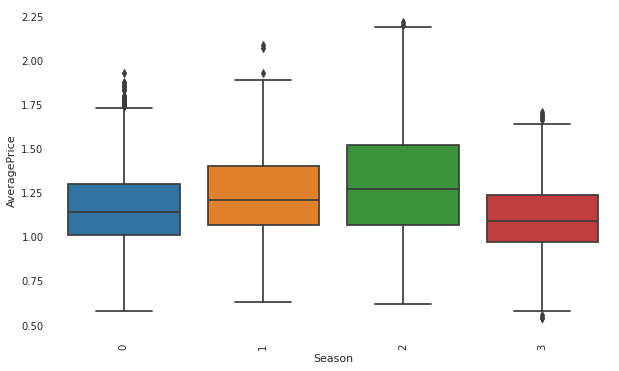

In [ ]:
#type = conventional:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df[df['type']=='conventional'],x='Season',y='AveragePrice',ax=ax)
plt.xticks(rotation=90)
plt.show()

Nhận xét: cùng một loại bơ conventional qua những mùa khác nhau thì giá cũng khác nhau

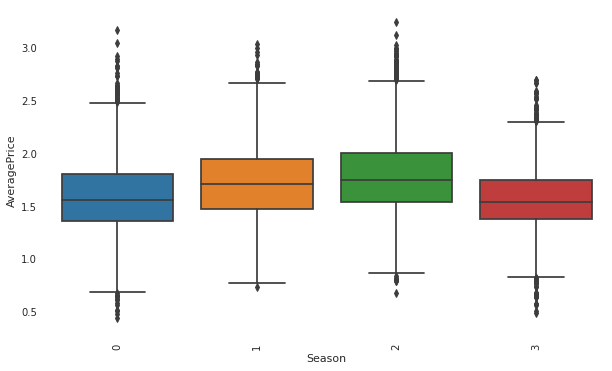

In [ ]:
# type == 'organic'
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df[df['type']=='organic'],x='Season',y='AveragePrice',ax=ax)
plt.xticks(rotation=90)
plt.show()

Nhận xét: cùng một loại bơ conventional qua những mùa khác nhau thì giá cũng khác nhau

==> Season có ảnh hưởng đến Average Price (của cả type organic và conventional)

###Label encoder các biến phân loại

In [ ]:
le = LabelEncoder()
df['type_new'] = le.fit_transform(df['type'])

In [ ]:
df.head()

,index,Date,AveragePrice,TotalVolume,type_4046,type_4225,type_4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region,Month,Season,type_new
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,3,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,3,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,3,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12,3,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,2,0


In [ ]:
df_ohe = pd.get_dummies(data=df,columns=['region'])
df_ohe.head()

,index,Date,AveragePrice,TotalVolume,type_4046,type_4225,type_4770,TotalBags,SmallBags,LargeBags,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,...,0,0,0,0,0,0,0,0,0,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,...,0,0,0,0,0,0,0,0,0,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,...,0,0,0,0,0,0,0,0,0,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,...,0,0,0,0,0,0,0,0,0,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_ohe = df_ohe.drop(['index'], axis=1) 

In [ ]:
# choose TotalValume bc it has high corr with '4046','4225','4770','Small Bags', 'Large Bags', 'XLarge Bags'
X = df_ohe.drop(['Date','AveragePrice' , 'type','type_4046', 'type_4225', 'type_4770',
       'SmallBags', 'LargeBags', 'XLargeBags'], axis=1)
y = df['AveragePrice']

In [ ]:
X.head()

,TotalVolume,TotalBags,year,Month,Season,type_new,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,64236.62,8696.87,2015,12,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,54876.98,9505.56,2015,12,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,118220.22,8145.35,2015,12,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,78992.15,5811.16,2015,12,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51039.60,6183.95,2015,11,2,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0   1.33
1   1.35
2   0.93
3   1.08
4   1.28
Name: AveragePrice, dtype: float64

#Bước 4&5: Modeling & Evaluation/ Analyze & Report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

Linear Regression

In [ ]:
pipe_LR = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])
pipe_LR.fit(X_train, y_train)
y_pred_LR = pipe_LR.predict(X_test)
r2_score(y_test, y_pred_LR)

0.5720273268151997

In [ ]:
mae_LR = mean_absolute_error(y_test, y_pred_LR)
mae_LR 

0.19670259364302295

Random Forest

In [ ]:
pipe_RF = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
pipe_RF.fit(X_train, y_train)
y_pred_RF = pipe_RF.predict(X_test)
r2_score(y_test, y_pred_RF)

0.8878293493706773

In [ ]:
mae_RF = mean_absolute_error(y_test, y_pred_RF)
mae_RF

0.09311466666666669

XGBoost

In [ ]:
pipe_XGB = Pipeline([('scaler', StandardScaler()), ('xgb', XGBRegressor())])
pipe_XGB.fit(X_train, y_train)
y_pred_XGB = pipe_XGB.predict(X_test)
r2_score(y_test, y_pred_XGB)

0.8806410654579536

In [ ]:
mae_XGB = mean_absolute_error(y_test, y_pred_XGB)
mae_XGB

0.09944165855633315

Lazy Regressor

In [ ]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None) 
models, predictions = clf.fit(X_train, X_test, y_train, y_test) 

100%|██████████| 42/42 [02:25<00:00,  3.46s/it]


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.91,0.91,0.12,7.24
RandomForestRegressor,0.89,0.89,0.13,7.55
XGBRegressor,0.88,0.88,0.14,2.70
BaggingRegressor,0.87,0.87,0.14,0.86
LGBMRegressor,0.85,0.85,0.15,0.55
HistGradientBoostingRegressor,0.85,0.85,0.15,1.82
MLPRegressor,0.83,0.84,0.16,12.67
ExtraTreeRegressor,0.82,0.82,0.17,0.19
KNeighborsRegressor,0.82,0.82,0.17,4.22


<font color='red'>- Model ExtraTreesRegressor cho hệ số score cao hơn RandomForest Regressor, RMSE và thời gian xử lý nhanh hơn RandomForest và so các model khác ExtraTreesRegressor cho kết quả tốt hơn => chọn ExtraTreesRegressor </font>

Model: ExtraTreesRegressor

Cross Validation

In [ ]:
test_size_lst = [0.3,0.25,0.2]
for i in test_size_lst:
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=i)
  pipe = Pipeline([('scaler',StandardScaler()),('RD',ExtraTreesRegressor())])
  pipe.fit(X_train,y_train)
  score_train = pipe.score(X_train,y_train)
  score_test = pipe.score(X_test,y_test)
  print('with [',1-i,':',i,'], score train is ',round(score_train,2),
        ', score test is', round(score_test,2),
        'diff is', round(abs(score_train-score_test),2))

with [ 0.7 : 0.3 ], score train is  1.0 , score test is 0.91 diff is 0.09
with [ 0.75 : 0.25 ], score train is  1.0 , score test is 0.9 diff is 0.1
with [ 0.8 : 0.2 ], score train is  1.0 , score test is 0.91 diff is 0.09


GridSearchCV

In [ ]:
param_grid ={'n_estimators' : [50,100,150,200],'max_features': ['auto', 'sqrt', 'log2'],'random_state':[0,1,42]}
cv_model = GridSearchCV(estimator=ExtraTreesRegressor(),param_grid=param_grid,cv=5)
cv_model.fit(X_train,y_train)
cv_model.best_params_

{'max_features': 'auto', 'n_estimators': 200, 'random_state': 1}

In [ ]:
# Kiểm tra độ chính xác
y_pred = cv_model.predict(X_test)
print('The Train/score is:',cv_model.score(X_train,y_train))
print('The Test/score is:',cv_model.score(X_test,y_test))

print('Mean squared error ',mean_squared_error(y_test,y_pred))
print('Mean absolut error ',mean_absolute_error(y_test,y_pred))

The Train/score is: 1.0
The Test/score is: 0.9113793063468686
Mean squared error  0.013874095915322572
Mean absolut error  0.07848811290322587


Random Search

In [ ]:
param_dist ={'n_estimators' : [50,100,150,200],'max_features': ['auto', 'sqrt', 'log2'], 'random_state':[0,1,42]}
cv_model = RandomizedSearchCV(estimator=ExtraTreesRegressor(),param_distributions=param_dist,cv=5)
cv_model.fit(X_train,y_train)
cv_model.best_params_

{'max_features': 'auto', 'n_estimators': 150, 'random_state': 0}

In [ ]:
# Kiểm tra độ chính xác
Y_pred = cv_model.predict(X_test)
print('The Train/score is:',cv_model.score(X_train,y_train))
print('The Test/score is:',cv_model.score(X_test,y_test))

print('Mean squared error ',mean_squared_error(y_test,Y_pred))
print('Mean absolut error ',mean_absolute_error(y_test,Y_pred))

The Train/score is: 1.0
The Test/score is: 0.9107871199996119
Mean squared error  0.013966806205017914
Mean absolut error  0.07860976344086028


<font color='red'> Quan sát kết quả và đánh giá
- Hệ số score train score và test score cao
- Mean squared error và Mean absolut error tương đối
- => model có độ chính xác cao 
</font>

Build theo ExtraTreesRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Model Random Forest Regressor
pipe_ER = Pipeline([('scaler',StandardScaler()),('er',ExtraTreesRegressor(max_features='auto', n_estimators = 200, random_state = 1))])
pipe_ER.fit(X_train,y_train)
y_pred_ER = pipe_ER.predict(X_test)

In [ ]:
df1 = pd.DataFrame({'Actual':y_test,
                   'Predict':y_pred_ER})
df1.head()

,Actual,Predict
14615,1.80,2.33
7749,1.57,1.49
11503,2.64,2.60
7234,1.66,1.61
10269,1.32,1.21


In [ ]:
# Kiểm tra độ chính xác
print('The Train score is: ',pipe_ER.score(X_train,y_train)*100,'%')
print('The Test score accuray is: ',pipe_ER.score(X_test,y_test)*100,'%')
print('The r2_score is: ',r2_score(y_test,y_pred_ER)*100,'%')

The Train score is:  100.0 %
The Test score accuray is:  90.94021733837482 %
The r2_score is:  90.94021733837482 %


In [ ]:
print('Mean squared error ',mean_squared_error(y_test,y_pred_ER))
print('Mean absolut error ',mean_absolute_error(y_test,y_pred_ER))

Mean squared error  0.013890319944354815
Mean absolut error  0.0812848870967741


<font color='red'>- Model ExtraTreesRegressor cho hệ số score cao và mse, mae đều nhỏ => model lựa chọn là phù hợp</font>

Tổng kết

###<font color='blue'>
- Qua các bước phân tích đơn biến, đa biến, tiền xử lý dữ liệu và phân tích mối quan hệ giữa các thuộc tính input và output => lựa chọn ra các thuộc tính phù hợp và phát sinh thêm một số thuộc tính mới để build model. <br>
- Qua phân tích các thuật toán, model ExtraTrees Regressor cho hệ số train score và test score ~91% cao hơn các thuật toán còn lại. Bên cạnh đó, thời gian xử lý, Mean squared error và Mean absolut error 0.01 và 0.08 nhỏ hơn các thuật toán khác.<br>     
- Thông qua các kỹ thuật lựa chọn tham số, từ Cross Validation lựa chọn khoản chia data với tỉ lệ 0.8:02, từ GridSearchCV và Random Search lựa chọn ra các tham số 'max_features': 'auto', 'n_estimators': 200, 'random_state': 42 <br>
=> Với model ExtraTrees Regressor và các tham số được lựa chọn mô hình cho kết quả tốt, chênh lệch giữ train score và test score nhỏ và dự báo được xu hướng tăng trưởng trong tương lai.
</font>